In [72]:
!pip install scikit-learn-extra

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
scaled_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/ScaledCustomerData.csv',index_col='ID')

scaled_df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,TotalNumPurchases,AvgCostperCart,AcceptedCmpTotal,Household,Month,DaysSinceJoin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,0.378641,0.5,0.0,0.084832,0.0,0.0,0.585859,0.425318,1.000000,0.982014,1.000000,1.000000,0.695652,0.500000,0.666667,1.0,0.307692,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.643352,0.771084,0.559581,0.0,0.00,0.272727,0.913452
2174,0.407767,0.5,0.0,0.067095,0.5,0.5,0.383838,0.007368,0.012346,0.010791,0.016598,0.012346,0.047431,0.333333,0.083333,0.1,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008780,0.265060,0.024697,0.0,0.50,0.636364,0.117592
4141,0.300971,0.5,1.0,0.105097,0.0,0.0,0.262626,0.285332,0.604938,0.228417,0.921162,0.259259,0.332016,0.166667,0.666667,0.2,0.769231,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307708,0.602410,0.342757,0.0,0.25,0.636364,0.444026
6182,0.116505,0.5,1.0,0.037471,0.5,0.0,0.262626,0.007368,0.049383,0.035971,0.082988,0.037037,0.039526,0.333333,0.166667,0.0,0.307692,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019157,0.337349,0.039605,0.0,0.50,0.818182,0.061148
5324,0.145631,1.0,1.0,0.085065,0.5,0.0,0.949495,0.115874,0.530864,0.212230,0.381743,0.333333,0.118577,0.833333,0.416667,0.3,0.461538,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166426,0.578313,0.193016,0.0,0.50,0.000000,0.301976


In [74]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/NOTScaledCustomerData.csv",index_col='ID')
data.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,TotalNumPurchases,AvgCostperCart,AcceptedCmpTotal,Household,Month,DaysSinceJoin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,59,2,0,58138.0,0,0,58,635,81,546,120.5,81,88.0,3,8,10,4,7,0,0,0,0,0,0,1,1617.0,32.0,50.53,0,1,4,1362
2174,62,2,0,46344.0,1,1,38,11,1,6,2.0,1,6.0,2,1,1,2,5,0,0,0,0,0,0,0,27.0,11.0,2.45,0,3,8,516
4141,51,2,1,71613.0,0,0,26,426,49,127,111.0,21,42.0,1,8,2,10,4,0,0,0,0,0,0,0,776.0,25.0,31.04,0,2,8,863
6182,32,2,1,26646.0,1,0,26,11,4,20,10.0,3,5.0,2,2,0,4,6,0,0,0,0,0,0,0,53.0,14.0,3.79,0,3,10,456
5324,35,3,1,58293.0,1,0,94,173,43,118,46.0,27,15.0,5,5,3,6,5,0,0,0,0,0,0,0,422.0,24.0,17.58,0,3,1,712


In [75]:
# Create 2 datasets. One will be used for the segmentation and will include the behavioral attributes of the customer such as
  # spending and campaign acceptance. The customers will be grouped by these. Those groups will then be profiled using the
  # data from the second dataset that is not scaled. Unscaled customer profiles are useful for marketing teams to be able
  # to target potential customers.

behavioral = ['ID', 'Recency','NumWebPurchases', 'MntWines', 'MntMeatProducts',
              'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmpTotal'
              'TotalAmountSpent', 'TotalNumPurchases', 'AvgCostperCart']

attributes= ['Age',
             'Education',
             'Marital_Status',
             'Income',
             'Kidhome',
             'Teenhome',
             'Household',
             'DaysSinceJoin',
             'NumDealsPurchases',
             'AcceptedCmpTotal',
             'NumCatalogPurchases',
             'NumStorePurchases',
             'NumWebPurchases']

# Create profile dataset
profile = pd.DataFrame()

for i in data.columns:
  if i in attributes:
    profile[i]=data[i].copy()

# match indexes for consistency
profile.set_index(data.index)

# generate list of attributes for later profiling:
attributes=list(profile.columns)

# Create segmentation dataset
segment = pd.DataFrame()

for i in scaled_df.columns:
  if i in behavioral:
    segment[i] = scaled_df[i]

# match index for consistency
segment.set_index(data.index)
segment.head()

,Recency,MntWines,MntMeatProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalNumPurchases,AvgCostperCart
ID,,,,,,,,,
5524,0.585859,0.425318,0.982014,0.666667,1.0,0.307692,0.538462,0.771084,0.559581
2174,0.383838,0.007368,0.010791,0.083333,0.1,0.153846,0.384615,0.265060,0.024697
4141,0.262626,0.285332,0.228417,0.666667,0.2,0.769231,0.307692,0.602410,0.342757
6182,0.262626,0.007368,0.035971,0.166667,0.0,0.307692,0.461538,0.337349,0.039605
5324,0.949495,0.115874,0.212230,0.416667,0.3,0.461538,0.384615,0.578313,0.193016


## **Using PCA to the data to visualize the data distributed in minimized dimensions**

### **Applying PCA**

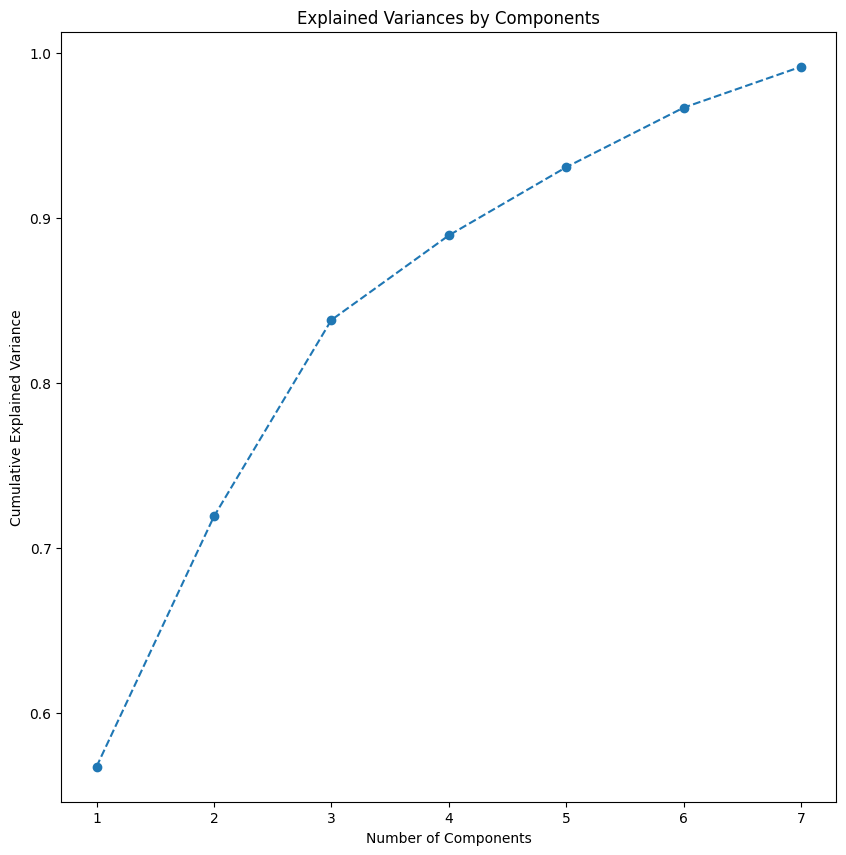

In [76]:
# Defining the number of principal components to generate

pca_test = PCA(n_components = 7, random_state = 1)

df_pca0 = pca_test.fit_transform(segment)

cum_exp_var = pca_test.explained_variance_ratio_.cumsum()


# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), cum_exp_var, marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [77]:
# How many components do we need to explain at least 70% of the variation in the dataset?

cum_exp_var = pd.DataFrame(cum_exp_var, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], columns = ['ExplainedVariation'])
cum_exp_var

,ExplainedVariation
PC1,0.567520
PC2,0.719184
PC3,0.838262
PC4,0.889542
PC5,0.930889
PC6,0.966974
PC7,0.991791


*Observations:*
- It appears that we need 5 components to explain 70% of the variation in the dataset

#####Run PCA with 3 Components:

In [78]:
# PCA with 3 components:

pca3 = PCA(n_components = 3)

df_pca3 = pd.DataFrame(pca3.fit_transform(segment), columns = ['PC1', 'PC2', 'PC3'],index=data.index)

var_loadings5 = pd.DataFrame(pca3.components_, columns = segment.columns, index = ['PC1', 'PC2', 'PC3']).T

In [79]:
# Individual variance explained by each component to test how significant each is:

exp_var3 = pd.DataFrame(pca_test.explained_variance_ratio_, columns = ["Exp_var"])

print(exp_var3)

# Reveal significant variable loadings:

def color_high(val):

    if val < -0.25:
        return 'background: pink'

    elif val > 0.25:
        return 'background: skyblue'

var_loadings5.style.applymap(color_high)

    Exp_var
0  0.567520
1  0.151664
2  0.119078
3  0.051280
4  0.041347
5  0.036084
6  0.024817


,PC1,PC2,PC3
Recency,0.014815,-0.994746,-0.099663
MntWines,0.335678,0.018088,-0.162794
MntMeatProducts,0.513621,-0.020158,0.352904
NumWebPurchases,0.232037,0.060846,-0.570088
NumCatalogPurchases,0.421343,-0.012760,0.055300
NumStorePurchases,0.335257,0.046453,-0.325362
NumWebVisitsMonth,-0.186125,0.031584,-0.356704
TotalNumPurchases,0.211934,0.047668,-0.450908
AvgCostperCart,0.447177,-0.021293,0.273037


####**Principal Component Interpretation:**

**PC1:**

PC1 has positive correlations with Amount spent on wine and meat, purchases from the store and catalog, and the average cost per cart.
This may suggest that customers with a high PC1 score are higher spenders.


**PC2:**

PC2 has a strong negative correlation with only Recency. This suggests that customers with a high PC2 score are NOT engaged with the store at all.


**PC3:**

PC3 has strong negative correlations with number of web, store, and total purchases and web visits. There is a small positive correlation with meat and average cost per cart. This may underpin a weak pattern of customers that don't shop very often, but may like to purchase meat from us.


#**Testing different clustering methods:**

Each dataset is unique and may respond better to a different clustering method. Often selecting the ideal clustering method requires using your intuition to select a few different  methods and testing them to see which yields the best results.

In [80]:
def visualize_clusters(dataset,cluster_label):
  """
  This function creates a graph for each cluster, and each graph contains 5
  different boxplots, one for each principle component so that the clusters can
  be better understood.
  """

  # Create subplots with 5 rows and 1 column
  num_clusters=len(dataset[cluster_label].unique())
  fig, axes = plt.subplots(num_clusters, 1, figsize=(8, 10),sharey=True)



  # Iterate over each cluster
  for i in range(num_clusters):

      # Filter data for the current cluster
      cluster_data = dataset[dataset[cluster_label] == i]

      # Create a list of component columns
      component_cols = [f'PC{j}' for j in range(1,4)]

      # Select the component scores for the current cluster
      cluster_component_scores = cluster_data[component_cols]

      # Create the boxplot for the current cluster in the corresponding row
      cluster_component_scores.boxplot(ax=axes[i], grid = False)
      axes[i].axhline(y=0, color='red', linestyle='-')

      # Set the title and y-axis label for the current cluster's boxplot
      axes[i].set_title(f'Cluster {i } Component Scores')
      axes[i].set_ylabel('Score')

  # Adjust the spacing between subplots
  plt.tight_layout()

  # Display the plot
  plt.show()

In [81]:
# Create function for profiling clusters:

def visualize_cluster_profiles(label, label_name:str):

  """
  This function adds the new cluster labels to the 'profile' dataframe(which
  contains the customer attributes), then generates the means of each attribute
  using by grouping by the new labels.

  Then using the groupby dataset, it creates a visualization to help the user
  view each attribute by label.
  """
  profile[label_name]=label

  cluster_profile=profile.groupby(label_name).mean()
  len_attributes=(len(attributes))

  fig,axs=plt.subplots(len_attributes,figsize=(10,25))
  axs=axs.flatten()

  for j,i in enumerate(attributes):
    valid_indices=range(len(cluster_profile.index))
    axs[j].bar(x=valid_indices,
              height=cluster_profile[i])
    axs[j].set_ylabel(f'{i}')
    axs[j].set_title(f'{i} Across Clusters')
    axs[j].set_xlabel('Clusters')

  plt.tight_layout()
  plt.show()



# **K-Means**

####Silhouette and Davies-Bouldin Scoring
Determine Ideal Number of K-Medoid Clusters to Create:

Observations:
- The elbow is at 4 or 5 clusters

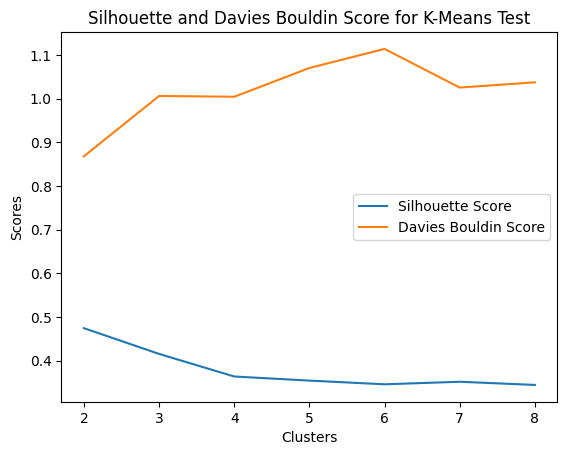

In [82]:
# I want to create a few different instances of the KM model with different numbers of clusters and measure the DBA score
# as well as the silhouette score so that I can validate the number of clusters used.

# Set random seed for consistent results
np.random.seed(42)

# Create empty dictonary to easily store my scores
dba = {}
silhouette = {}

# Iterate over my selected range of possible clusters
for k in range(2,9):
  #create keys
  dba_key = f"dba_k_{k}"
  silh_key = f"silh_k_{k}"

  # create KMean instance
  km = KMeans(n_clusters = k, random_state = 1)
  labs = km.fit_predict(df_pca3)

  # Davies Bouldin scoring
  dba_score = davies_bouldin_score(df_pca3, labs)
  dba[dba_key] = dba_score

  #Silhouette scoring
  silhouette[silh_key] = silhouette_score(df_pca3, labs)

# Combine my scores into a DataFrame
k = list(range(2,9))
zips = zip(k, silhouette.values(), dba.values())
km_scores = pd.DataFrame(zips, columns = ['clusters', 'silh_score', 'dba_score'])

# Plot my results
sns.lineplot(data=km_scores, x='clusters', y='silh_score', label='Silhouette Score')
sns.lineplot(data=km_scores, x='clusters', y='dba_score', label='Davies Bouldin Score')
plt.ylabel('Scores')
plt.xlabel('Clusters')
plt.title('Silhouette and Davies Bouldin Score for K-Means Test')
plt.legend()

plt.show()

**Observations**:

- We want a silhouette score close to 1 and a low Davies-Bouldin score.
- The optimal value is 3 clusters.

**Applying KMeans on the PCA data and visualize the clusters**

In [83]:
# Set random seed for consistent results
np.random.seed(42)

kmeans = KMeans(n_clusters = 3)

kmean_labs = kmeans.fit_predict(df_pca3.copy())
kmean_centroids = kmeans.cluster_centers_

pca_and_labels = df_pca3.copy()
pca_and_labels['kmean_labs'] = kmean_labs
profile['kmean_labs']=kmean_labs

In [84]:
# Create a dictionary to keep track of the Silhouette scores of the different clustering methods

SilhouetteScores = {}
a = silhouette_score(df_pca3.values, kmean_labs)
SilhouetteScores['kmeans'] = a
print(SilhouetteScores)

{'kmeans': 0.4154305519299572}


In [85]:
# How big are each of the clusters?

print("The clusters are sized as follows:\n",
      pca_and_labels['kmean_labs'].value_counts())


The clusters are sized as follows:
 1    1117
2     652
0     471
Name: kmean_labs, dtype: int64


###Visualize K-Means Clusters with principle components:

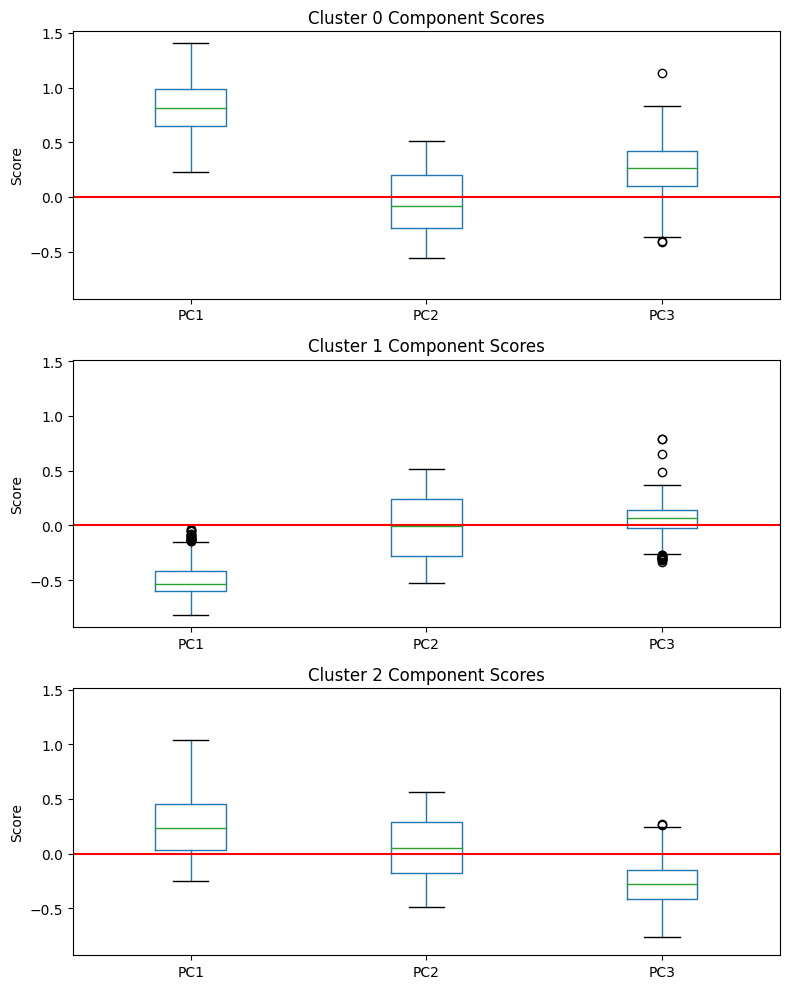

In [86]:
# Visualize Clusters
visualize_clusters(pca_and_labels, 'kmean_labs')

##Cluster Qualities:
**Cluster 0:**
High Positive PC1 Score concentrated between 1.0 and 0.6
PC2 Score near 0 concentrated between -0.25, and 0.25
Small Positive PC3 Score concentrated between 0.1 and 0.4

Cluster 0 defined by higher spenders with no pattern of shopper frequency and some tendency towards meat and wine purchase


**Cluster 1:**
Negative PC1 Score with tight concentration near -0.5.
PC2 Score near 0 concentrated between -0.25, and 0.25
PC3 Score near 0 with tight concentration

Cluster 1 is only defined by lower spenders.


**Cluster 2:**
Small Positive PC1 Score concentrated between 0 and 0.5
PC2 Score near 0 between 0.25 and -0.2
Negative PC3 Score concentrated between -0.2 and -0.25

Cluster 2 is mostly defined by moderate spenders.

###Profile K-Means Clusters using Customer Attributes

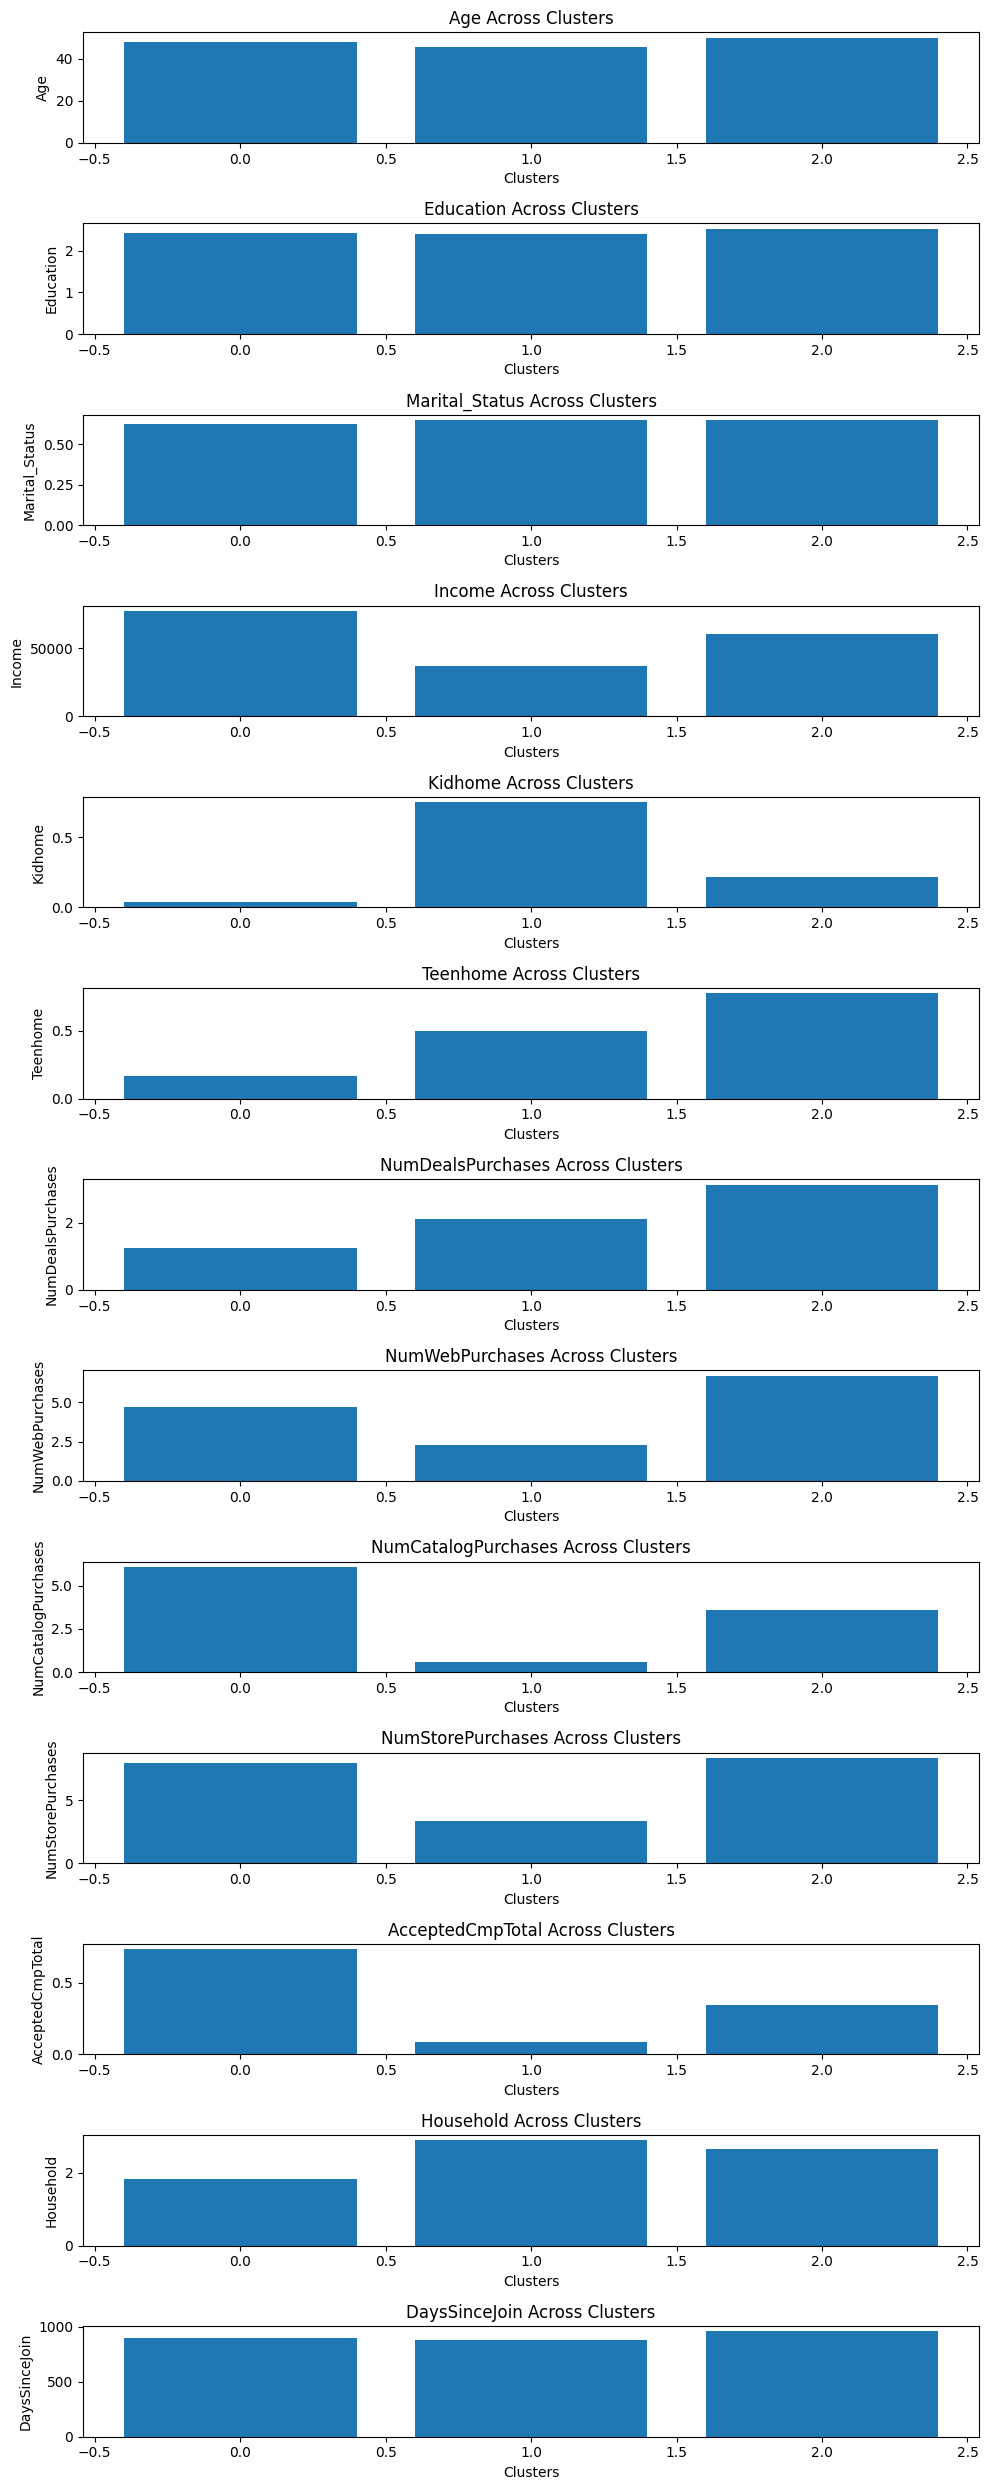

In [87]:
visualize_cluster_profiles(kmean_labs, 'kmean_labs')

##**K-Means Profiling:**

Cluster 0 has the highest income and the smallest household sizes. On average, they are big spenders, and have responded well to our campaigns, but do not shop deals very often. They prefer to shop in-store and order through the catalog.

Cluster 1 has the lowest income and highest family sizes. Our campaigns have resonated with them the least of all the clusters. While they do not shop often, their preferred channel is in store. Even though they are lower income, they do not shop deals as often as cluster 2. This suggests low engagement.

Cluster 2 has a moderate income and moderately sized households that are more likely to have more teens than younger children. Those in Cluster 2 favor our web and in-store channels, though appear to be familiar enough with the catalog. They appear to love deals and accept a moderate amount of campaigns. These customers are **Highly** engaged.



#**K-Medoids:**

####Silhouette and Davies-Bouldin Scoring
Determine Ideal Number of K-Medoid Clusters to Create:

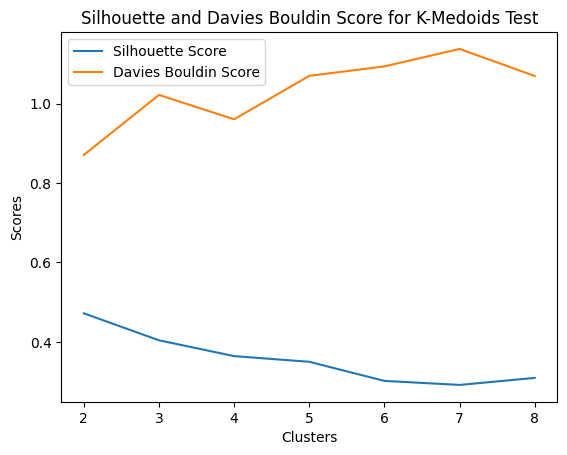

In [88]:
# Create a few different instances of kmedoids test with a different number of
  # clusters.

# Create dataframe copy
kmedoid5 = df_pca3.copy()

# Create empty dictonary to easily store my scores
dba = {}
silhouette = {}

# Iterate over my selected range of possible clusters
for k in range(2,9):
  #create keys
  dba_key = f"dba_k_{k}"
  silh_key = f"silh_k_{k}"

  # Initialize and fit the model
  kmed = KMedoids(n_clusters = k, method = 'pam', random_state = 1)
  kmed = kmed.fit(kmedoid5)

  # Generate labels
  labs = kmed.labels_


  # Davies Bouldin scoring
  dba[dba_key] = davies_bouldin_score(kmedoid5, labs)

  #Silhouette scoring
  silhouette[silh_key] = silhouette_score(kmedoid5, labs)

# Combine my scores into a DataFrame
k = list(range(2,9))
zips = zip(k, silhouette.values(), dba.values())
kmed_scores = pd.DataFrame(zips, columns = ['clusters', 'silh_score', 'dba_score'])

# Plot my results
sns.lineplot(data=kmed_scores, x='clusters', y='silh_score', label='Silhouette Score')
sns.lineplot(data=kmed_scores, x='clusters', y='dba_score', label='Davies Bouldin Score')
plt.ylabel('Scores')
plt.xlabel('Clusters')
plt.title('Silhouette and Davies Bouldin Score for K-Medoids Test')
plt.legend()

plt.show()

Observations:
- The ideal number of clusters appears to be 3.

In [89]:
# Initialize and fit the model with 3 clusters
kmed = KMedoids(n_clusters = 3, method = 'pam', random_state = 1).fit(df_pca3.copy())

# Generate labels
kmed_lab = kmed.labels_

kmed_labels = pd.Series(list(kmed_lab))

# Incorporate labels into profile dataframe
pca_and_labels['kmed_labs'] = kmed_labels

# add silhouette score to dictionary:
SilhouetteScores['kmedoid'] = silhouette_score(df_pca3.copy().values, kmed_labels)
print(SilhouetteScores)

# print cluster sizes:
print("The clusters are sized as follows:\n",
      pca_and_labels['kmed_labs'].value_counts())

{'kmeans': 0.4154305519299572, 'kmedoid': 0.4038792687407991}
The clusters are sized as follows:
 0.0    199
2.0    130
1.0    108
Name: kmed_labs, dtype: int64


###Visualize K-Mediod Clusters with principle components:

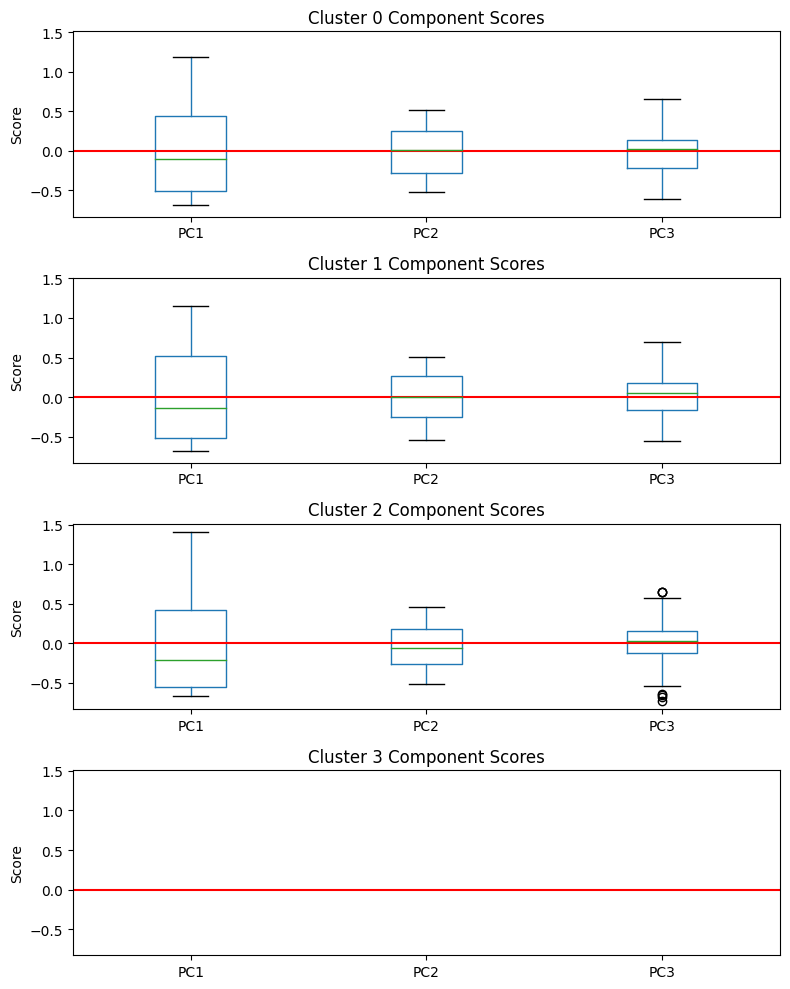

In [90]:
visualize_clusters(pca_and_labels, 'kmed_labs')

##**Cluster Qualities:**

None of the clusters appear to have a strong preference for any of the principle components. K-Medoids did not produce favorable clusters according to the Clustering Method

###Profile K-Medoid Clusters using Customer Attributes

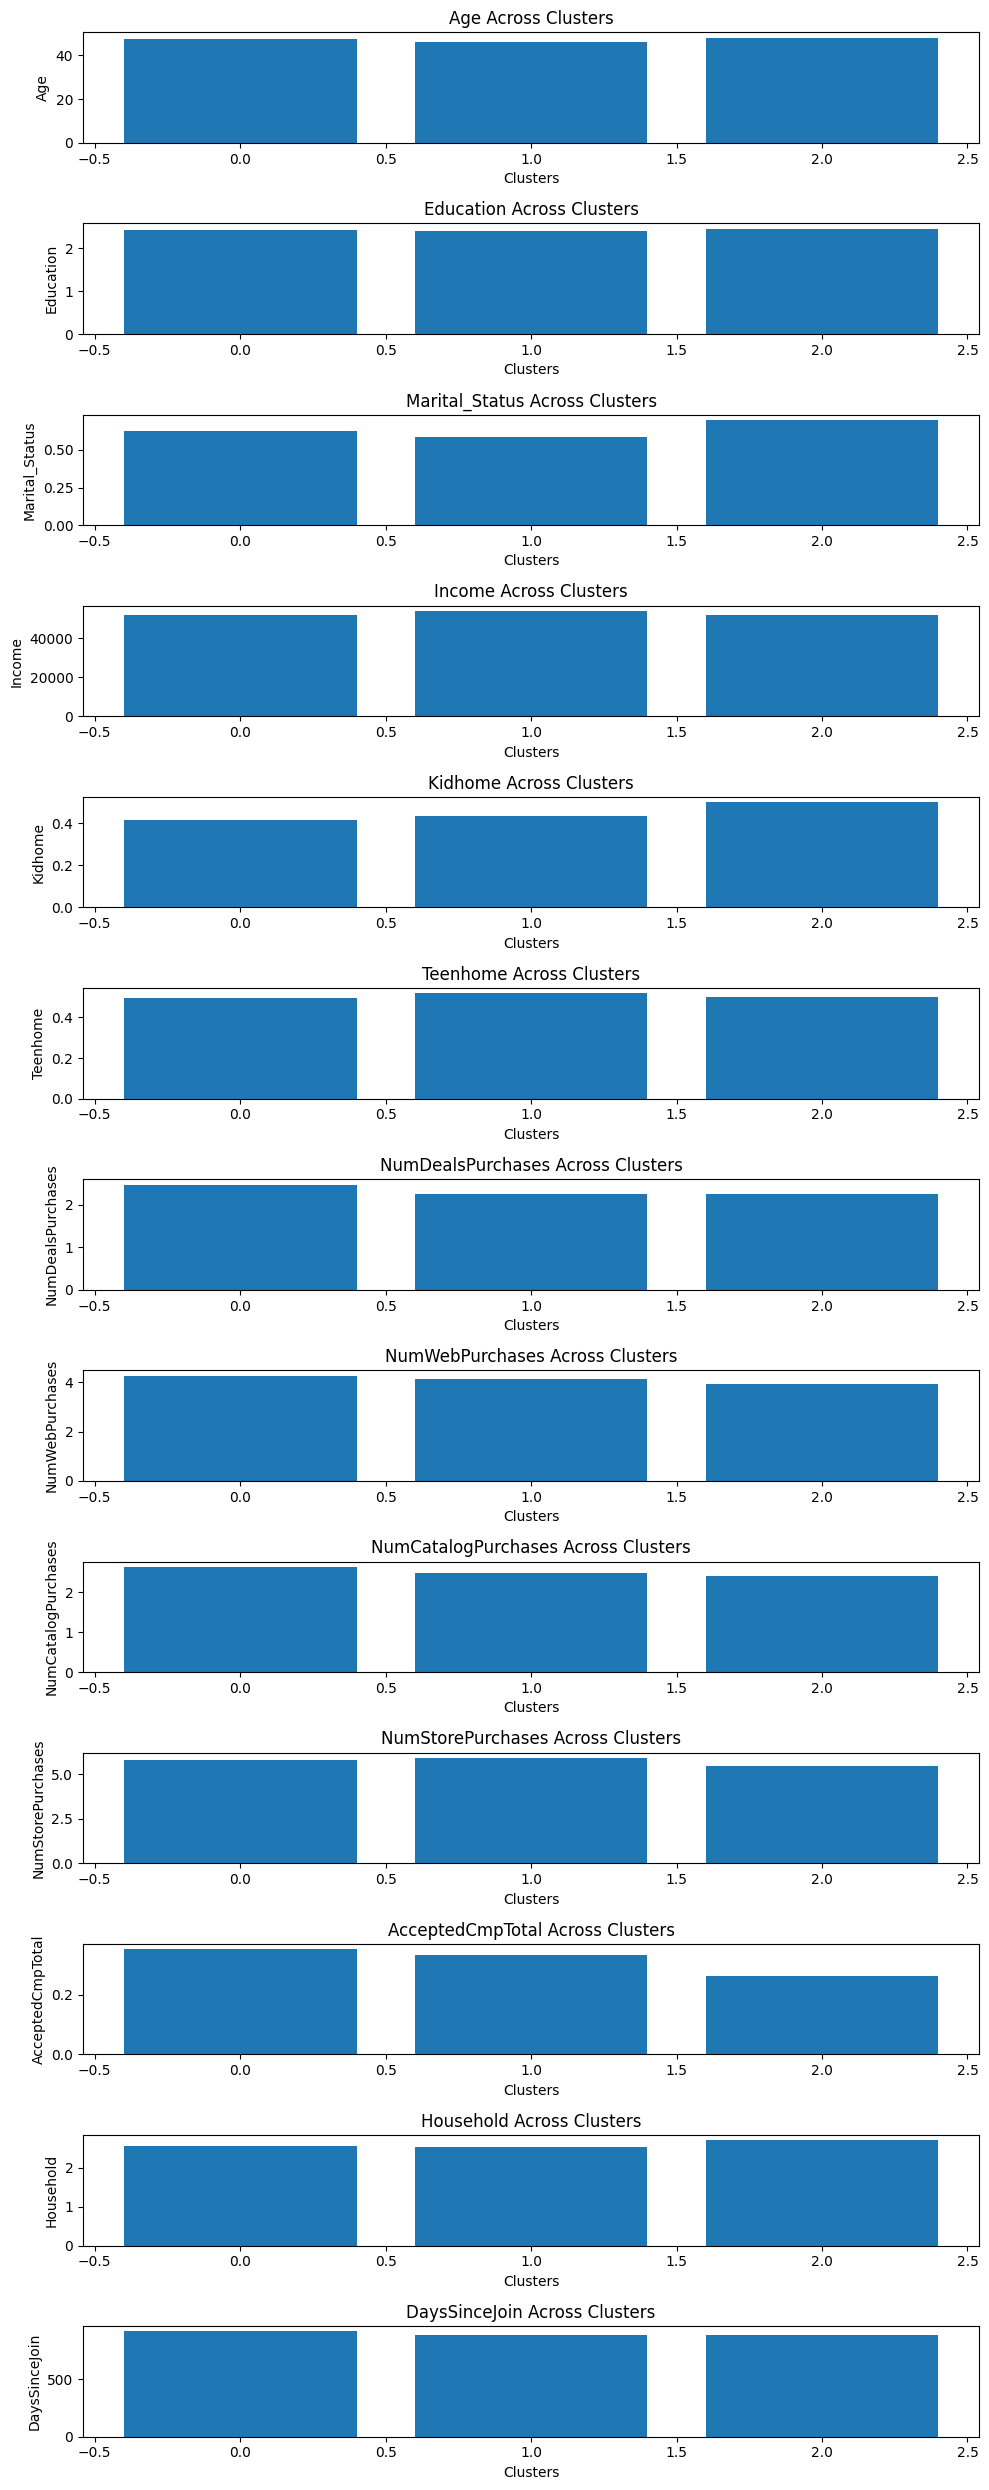

In [91]:
# Vizualize K-Medoid Clusters:
visualize_cluster_profiles(kmed_labels, 'kmed_labels')

##**K-Medoid Profiling:**
K-Medoid Clusters are not significantly distinguishable by any of the attribute characteristics in the dataset with the slight exception of some small differences between the likelyhood of a customer being married in a particular cluster, the total campaigns accepted, and the size of its household.

#**Gaussian Mixture Model:**

####Silhouette and Davies-Bouldin Scoring
Determine Ideal Number of Gaussian Distribution to Use to Model Data:

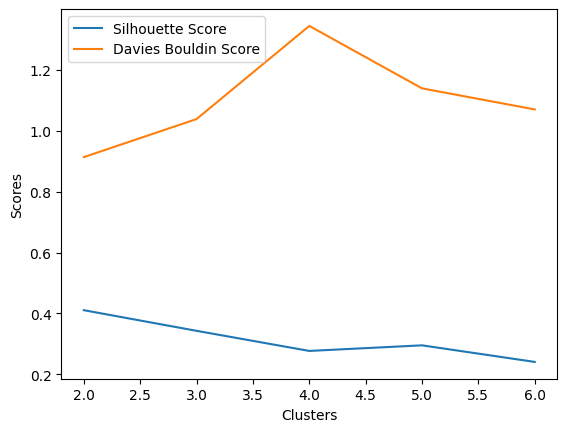

In [92]:
# I want to create a few different instances of the GMM model with different numbers of clusters and measure the DBA score
# as well as the silhouette score so that I can validate the number of clusters used.

# Create a copy of the data to avoid making changes
gaussian5 = df_pca3.copy()

# Create empty dictonaries to easily store my scores
dba = {}
silhouette = {}

# Iterate over my selected range of possible clusters
for k in range(2,9):
  #create keys
  dba_key = f"dba_k_{k}"
  silh_key = f"silh_k_{k}"

  # create Gaussian instance
  gm = GaussianMixture(n_components = k, random_state = 1)
  labs = gm.fit_predict(df_pca3)

  # Davies Bouldin scoring
  dba[dba_key] = davies_bouldin_score(df_pca3, labs)

  #Silhouette scoring
  silhouette[silh_key] = silhouette_score(df_pca3, labs)

# Combine my scores into a DataFrame
k = list(range(2,7))
zips = zip(k, silhouette.values(), dba.values())
gm_scores = pd.DataFrame(zips, columns = ['clusters', 'silh_score', 'dba_score'])

# Plot my results
sns.lineplot(data=gm_scores, x='clusters', y='silh_score', label='Silhouette Score')
sns.lineplot(data=gm_scores, x='clusters', y='dba_score', label='Davies Bouldin Score')
plt.ylabel('Scores')
plt.xlabel('Clusters')
plt.legend()

plt.show()

**Observations and Insights:**

- 3 clusters appears to be the ideal number of clusters since it has a highest silhouette score and a usable number of clusters. Similarly, it has a good trade-off between useable clusters and a relatively low Davies-Bouldin score.

In [93]:
gm = GaussianMixture(n_components = 3, random_state = 1)
gmm_labs = gm.fit_predict(gaussian5)

gaussian5['labels'] = gmm_labs

pca_and_labels['gmm_labels']=gmm_labs
SilhouetteScores['gmm_labels']= silhouette_score(df_pca3, gmm_labs)

# Show cluster sizes:

print("The clusters are sized as follows:\n",
      pca_and_labels['gmm_labels'].value_counts())

The clusters are sized as follows:
 2    915
1    847
0    478
Name: gmm_labels, dtype: int64


In [94]:
SilhouetteScores

{'kmeans': 0.4154305519299572,
 'kmedoid': 0.4038792687407991,
 'gmm_labels': 0.3430824746849634}

###Visualize Gaussian Mixture Model Clusters with principle components:

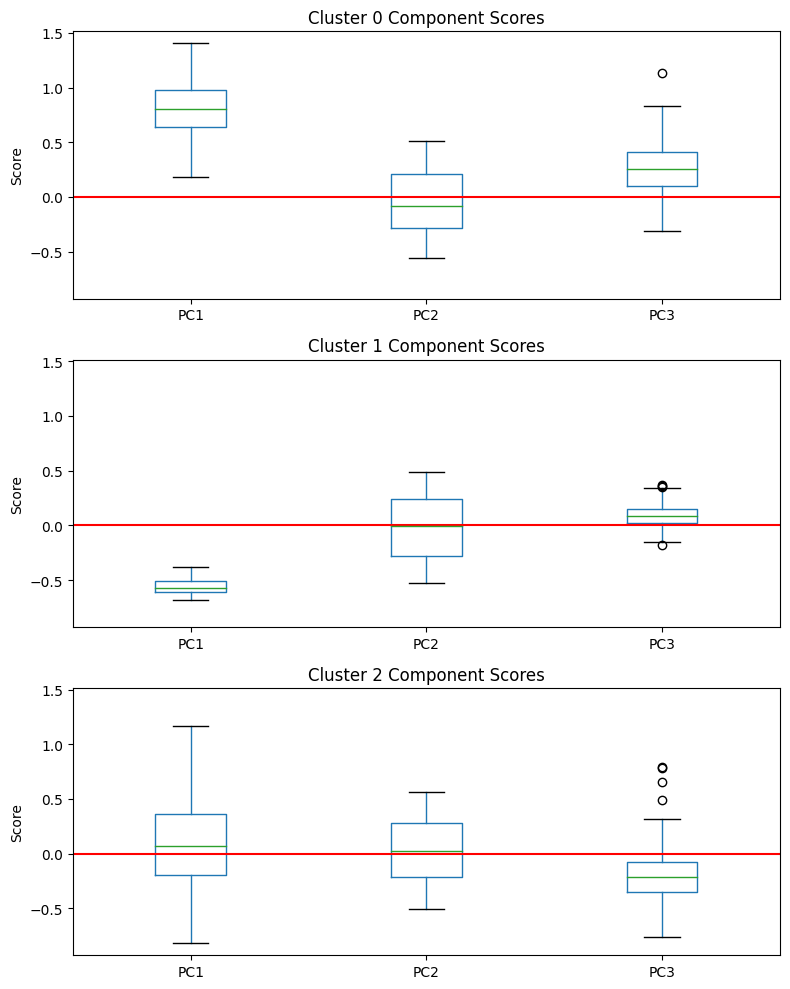

In [95]:
visualize_clusters(pca_and_labels,'gmm_labels')

##**Cluster Qualities:**
**Cluster 0:**
High Positive PC1 Score concentrated between 1.0 and 0.6
PC2 Score near 0 concentrated between -0.25, and 0.25
Small Positive PC3 Score concentrated between 0.1 and 0.4

Cluster 0 defined by higher spenders with no pattern of shopper frequency and some tendency towards meat purchase.
Cluster 0 in the Gaussian Mixture model almost mirrors Cluster 0 from the K-Means Algorithm


**Cluster 1:**
Negative PC1 Score with tight concentration near -0.5.
PC2 Score near 0 concentrated between -0.25, and 0.25
Small Positive PC3 Score just above 0 with tight concentration

Cluster 1 is mostly defined by lower spenders who aren't as engaged.
Cluster 1 in the Gaussian Mixture Model is very similar to Cluster 1 from the K-Means Algorithm in terms of PC scores.


**Cluster 2:**
PC1 Score close to 0 with broad range, may not be defined by spending
PC2 Score near 0 between 0.25 and -0.2
Negative PC3 Score concentrated between -0.1 and -0.4

Cluster 2 is defined by moderate spenders.

###Profile Gaussian Mixture Models using Customer Attributes

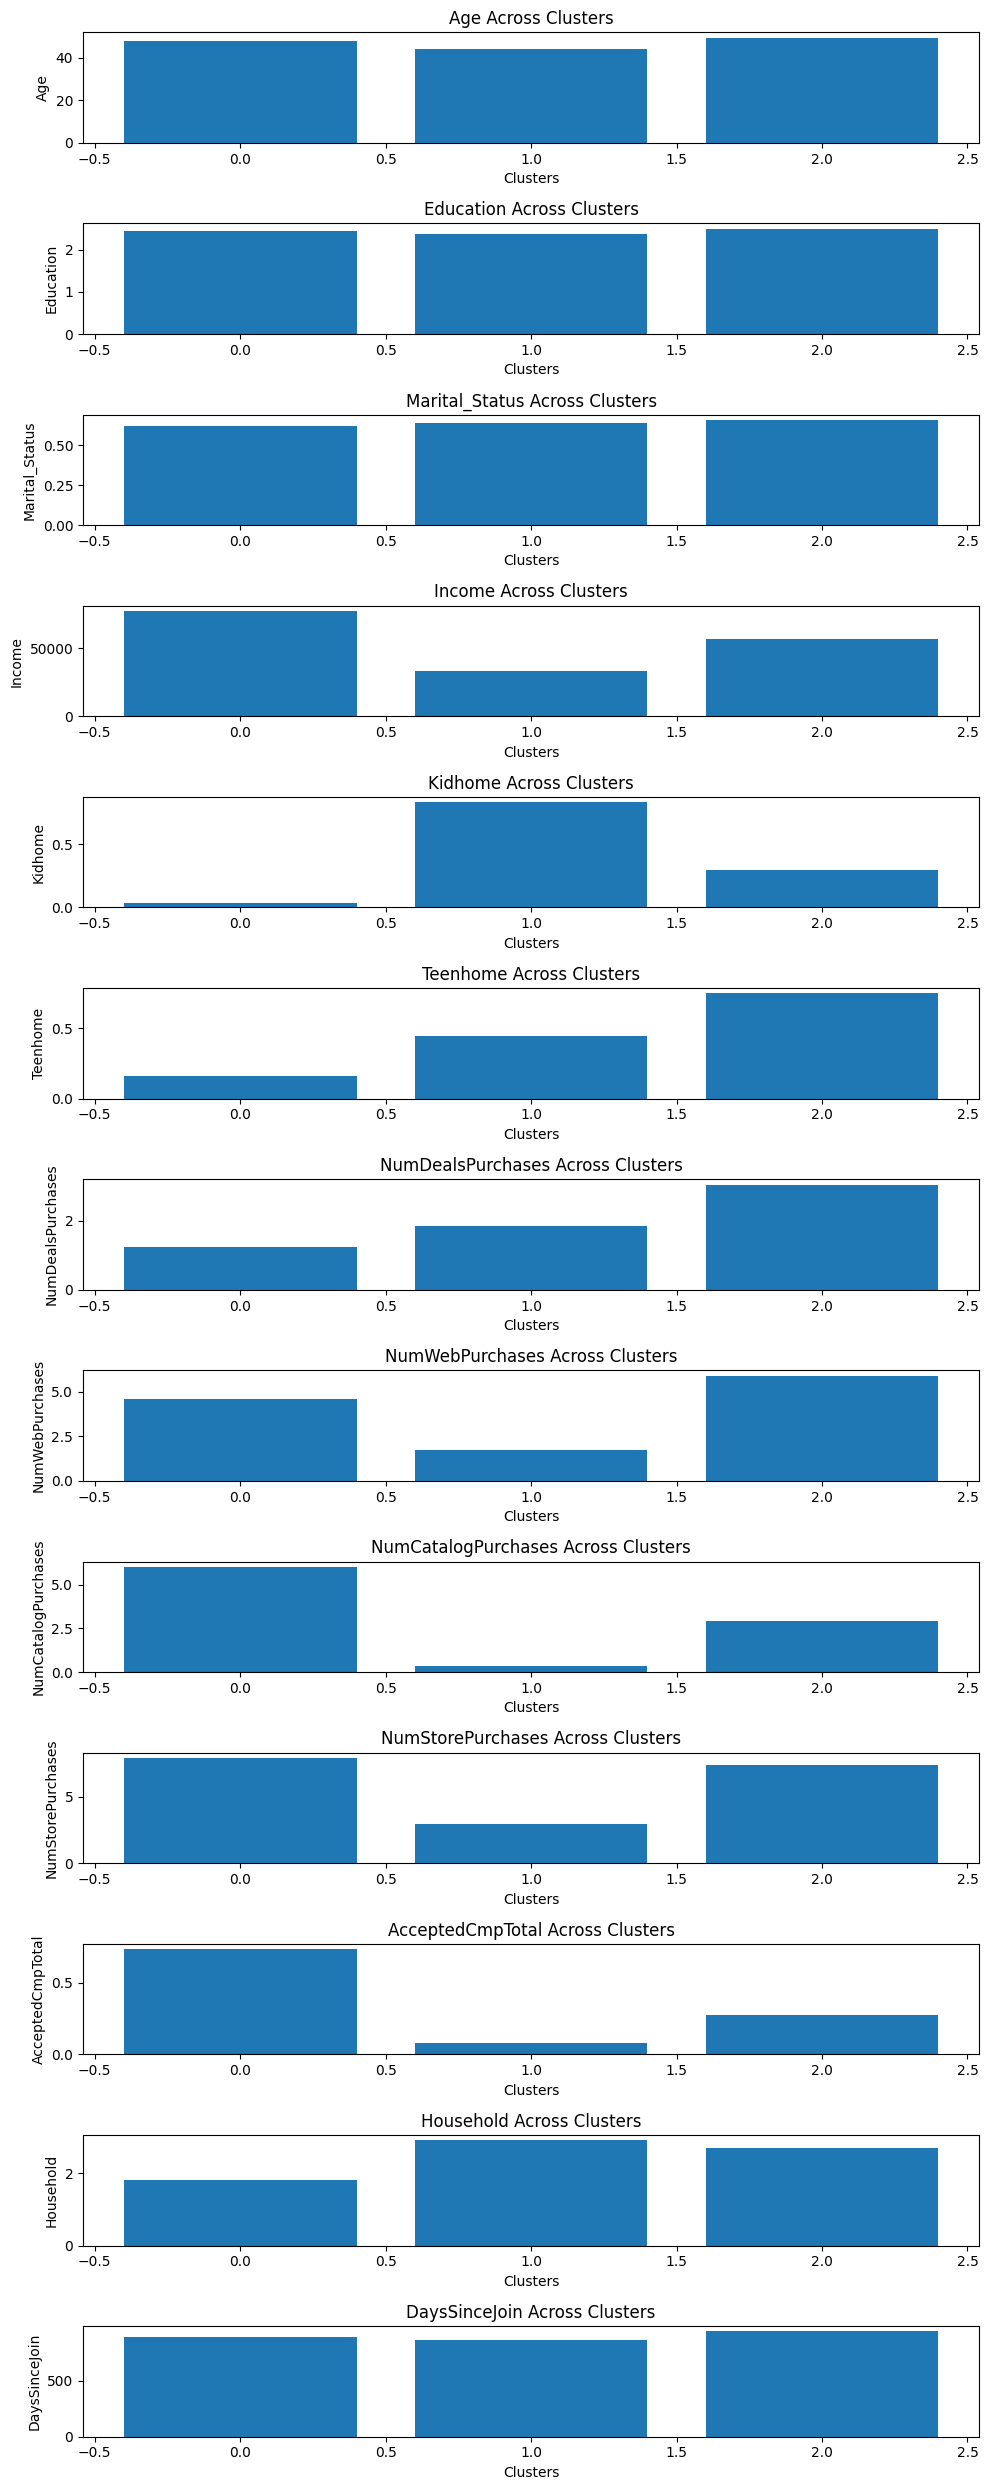

In [96]:
visualize_cluster_profiles(gmm_labs, 'gmm_labs')

##**Gaussian Mixture Model Cluster Profiling:**
Clusters not defined by Age, Education, Marital Status, or Days Since Joining.
These

**Cluster 0** has the highest income, near 80,000, and the smallest household sizes (slightly less than 2 on average). Customers in cluster 0 are not likely to have kids or teens in the home. They are very engaged customers. On average they have accepted more campaigns than the other clusters. They favor shopping in store and through the catalog, though they also use the website for purchases as well. They do not tend to shop deals.

**Cluster 1** has the lowest income at just under 40,000 and highest family sizes. Customers in Cluster 1 are fairly likely to have children in the home and slightly less likely to have teens. Average household size is close to 3 on average. They favor the store and cataloug and most haven't made any purchases via the web. The do not accept campaigns (or the campaigns don't reach or resonate with them).

**Cluster 2** has a moderate income near 50,000 on average and moderately sized households that are more likely to have more teens than younger children. Total household size is close to 3.
These are the thrifty shoppers. They accept more deals than the other 2 groups, but do not accept campaigns often. They tend to favor the web and the store.



#**Analysis of Results:**


Many Iterations of this notebook were executed. A variety of changes were made across iterations including changing the way outliers were treated, which variables had their outliers treated, and a process of eliminating or including variables into the dimensionality reduction and clustering analysis. The success of an an iteration was determined by the end result, the silhouette scores of the clustering methods used.

I attempted a variety of treatments on observations with outliers. One attempt substituted outliers that fell outside the traditional outlier definition (1.5 * IQR) with the respective upper or lower limit of a normal value. Another removed rows with outliers from the analysis completely. And another attempt only removed outliers from behavioral variables. Binary variables were ignored in this process as there are no outliers with normal binary variables.

In the process of deciding which variables to include in the dimensionality reduction and clustering analysis, the first focus was to eliminate variables and then add more in little at a time, each time focusing on the end results, the quality of the clusters as indicated by the silhouette score.
If removing a variable didn't result in a lower score, or improved the score, it was regarded as a positive change. Removing variables was not a random process. Removal or addition was based on the correlation coefficients in the heatmap in the Analysis notebook as well as variable loadings in the principal component analysis.

What isn't seen in the notebook is the results of the many other iterations of this project including or excluding some variables in the process of dimensionality reduction and segmentation. What should be noted is that the amounts spent on Meat and Wine are always the strongest correlations to our principle components among our expenditures across all of our iterations. In our final iteration, principle component 1 explains 57% of the variation in the dataset and has strong correlations to the amount spent on meat and wine products. This justifies the practice of having meat and wine as the only expenditure variables used in the analysis.

###**Recommendation:**
It was apparent in the analysis That Wine and Meat are our most popular products. The important of Meat and Wine products is highlighted by the fact that the Total expenditure is most strongly correlated to the expenditure on Meat and Wine products especially through the catalog and in-store. I recommend that we focus on selling these products especially on our web platform. Web purchases account for ~33% of our total sales, yet according to my analysis tht amount spent on Meat and Web purchases have a low correlation compared to the correlation between amount spent on meat and catalog and store purchases. This analysis is corroborated when analyzing the variable loadings for our principle components. Amount spent on Wine and Meat appear to be what drives purchasing in the catalog, in-store and increase the cost of our cart.

This suggests that we approach our web channel as a weak link in our business model. We should analyze our web platform to see why we aren't selling as much meat online as we are in store and in our catalogs. It is possible that an incentive program to increase meat expenditure online will be what customers need to get excited about making purchases.

I also recommend using the information revealed about our clusters to make our campaigns more targeted. Our enrollments have recently dropped significantly and it can be seen that the campaigns aren't successfully engaging our customers to a high enough degree. Targeted campaigns will increase engagement and profit.

Campaigns should be targeted at our K-Means Clusters 1 and 2.
The clusters with the most potential are clusters 1 and 2, our largest groups.

Those in Cluster 1 are our largest sized group and comprise 50% of our customers, yet aren't engaged. They rarely accept campaigns and don't accept deals as often as those in Cluster 2. This is counter-intuitive because on average, those in Cluster 1 make less money and have similar sized families, which should necessitate the same thriftyness that those in Cluster 2 demonstrate.

Though it isn't clear why Cluster 1 is less engaged, the data provides some feedback as to how we can improve our engagement with Cluster 1:  

Those in cluster 1 more often live in lower income homes with younger children. While they will never be able to spend as much as those in Cluster 0, we can increase their engagement by appealing to their need for budget friendly options using our success with Cluster 2 as a template with a few modifications to our campaign strategy. My vision is to convert customers in Cluster 1 to Cluster 2 customers.

Cluster 1 families will likely respond well to a marketing/branding approach that helps the individuals in Cluster 1 see our business as family friendly and having budget friendly options. This approach will pair nicely with my earlier proposal to analyzing our online platform and optimize our branding approach to those in Cluster 1. The targeted marketing may have the best ROI if we focus on drawing them into the store and to our website to shop for items that they need for their younger children (Cluster 1 customers are more likely to have more younger children than teens).


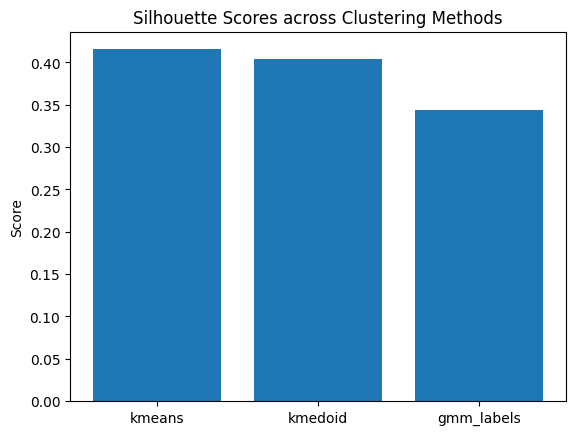

The kmeans clustering method had a Silhouette Score of 0.42. 


The kmedoid clustering method had a Silhouette Score of 0.4. 


The gmm_labels clustering method had a Silhouette Score of 0.34. 




In [97]:
# Graph Silhouette Scores

plt.bar(x=list(SilhouetteScores.keys()),height=list(SilhouetteScores.values()))
plt.ylabel("Score")
plt.title("Silhouette Scores across Clustering Methods")
plt.show()


for key,val in SilhouetteScores.items():
  print(f'The {key} clustering method had a Silhouette Score of {round(val,2)}. \n\n')

##**Results:**
K-Means produced the best clusters of the clustering methods used with a cluster score of 0.41. While K-Medoids was close behind at 0.40, a comparison between the cluster profiles revealed that the clusters themselves didn't reveal any information that could be used to identify potential customers. K-Medoids also featured clusters that had PC score distributions with a large spread. While interpretation of Principal Component Scores are of themselves difficult to interpret, the K-Medoids clustering rendered them incomprehensible.
The Gaussian Mixture model produced clusters that were very similar in profile and PC score distribution to those of the K-Means Clustering algorithm, the Silhouette score favored K-Means over the Gaussian clustering method.

